In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import json
import os

In [2]:
def plot_execs(key = "pops"):    
# Your JSON data
    combined_data = []
    path = "results/hyper/" + key
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Extracting data
    #execution_numbers = list(range(1, len(json_data["avg_fit"]) + 1))
    avg_fit = json_data["avg_fit"]
    min_fit = json_data["min_fit"]
    max_fit = json_data["max_fit"]
    #print(unique_solutions)
    #fig, ax = plt.subplots(figsize=(10, 6))
    #plt.plot(items_min)


    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    plt.axhline(y=179, color='r', linestyle='--', label='Target')
    #ax = fig.add_subplot(111)



    for i in range(len(combined_data)):
        plt.plot(list(range(1, len(items_min[i])+1)), items_min[i], label=solvers[i][0], color=colors[i*2])
        #plt.plot(list(range(1, len(items_max[i])+1)), items_max[i], label=solvers[i][0], color=colors[(i*2)+1])
        
        last_min_point = (len(items_min[i]), items_min[i][-1])
        plt.text(*last_min_point, f"{last_min_point[1]:.2f}", color=colors[i * 2], ha="left", va="bottom")

    #plt.plot(execution_numbers, avg_fit, label="Average Fitness", marker='o')
    #plt.plot(execution_numbers, min_fit, label="Minimum Fitness", marker='o')
    #plt.plot(execution_numbers, max_fit, label="Maximum Fitness", marker='o')


    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel("Fitness")
    plt.title("Fitness Over Executions")
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_execs("pops") # pops, gens, mut, sel

FileNotFoundError: [Errno 2] No such file or directory: 'results/hyper/pops'

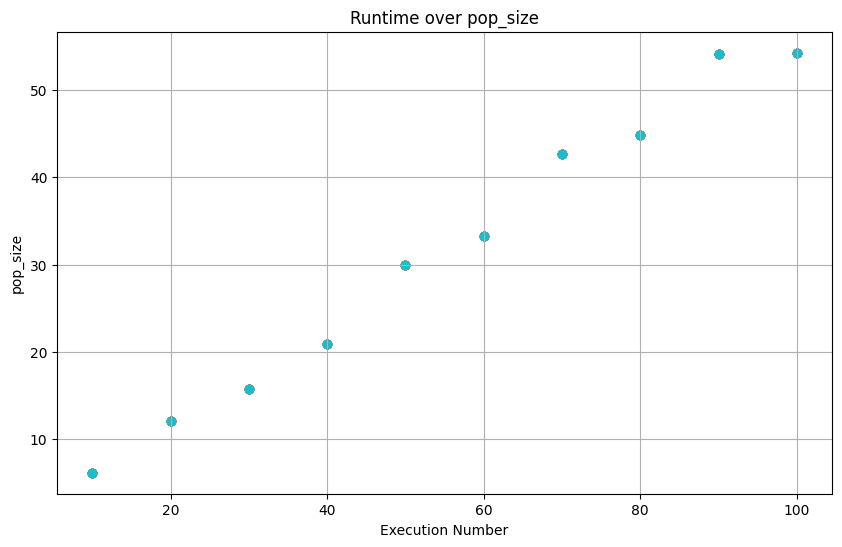

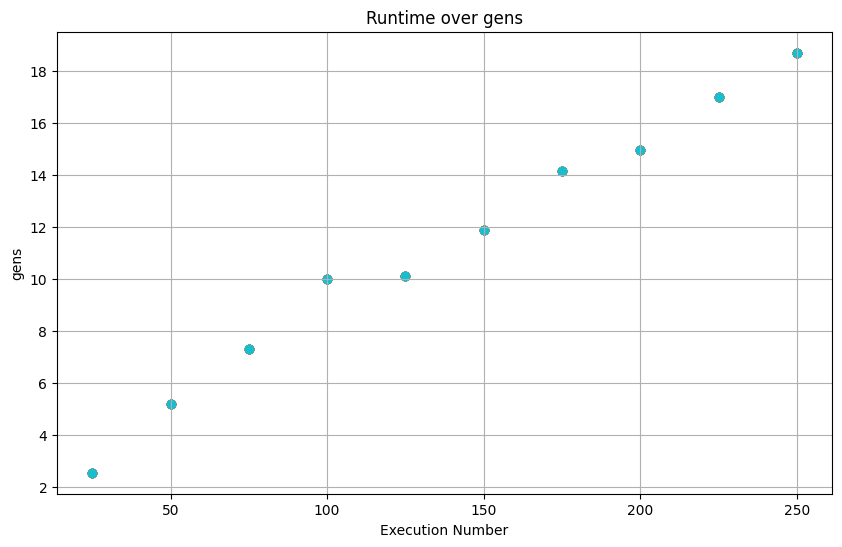

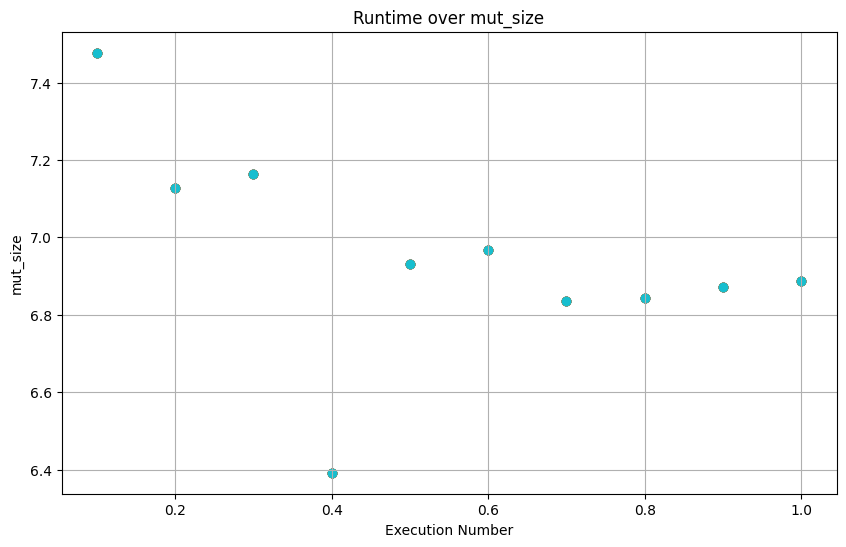

In [ ]:
def plot_runtime(key, variable="pop_size", path ="results/hyper/pops"):   
# Your JSON data
    combined_data = []
    path = path
    variable = variable
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]
    times = [item["time"][0] for item in combined_data]
    variables = [item[variable] for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111)



    for i in range(len(combined_data)):
        plt.scatter(variables, times, label=solvers[i][0], color=colors[i*2])
        
        
    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel(variable)
    plt.title(f"Runtime over {variable}")
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_runtime("pops", "pop_size", path ="results/hyper/pops") # pops, gens, mut, sel
plot_runtime("gens", "gens", path ="results/hyper/gens")
plot_runtime("mut", "mut_size", path ="results/hyper/mut")



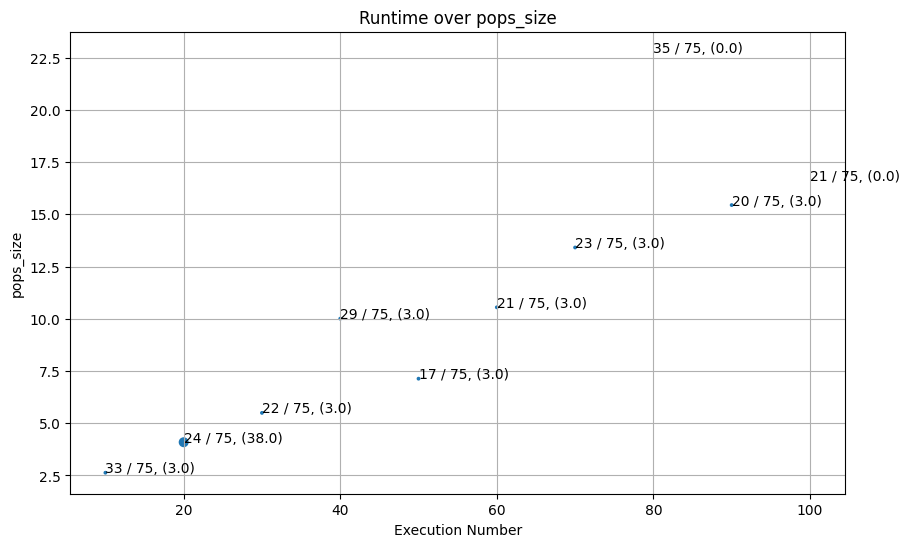

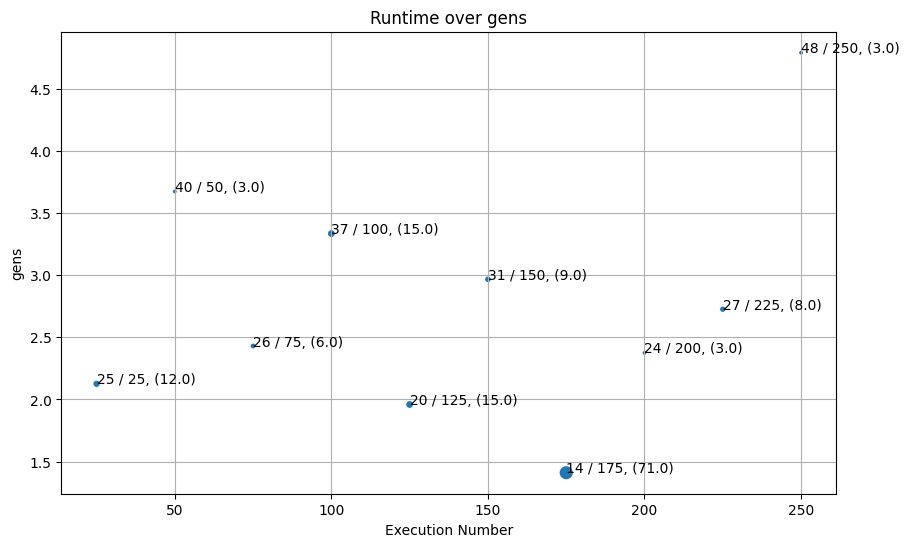

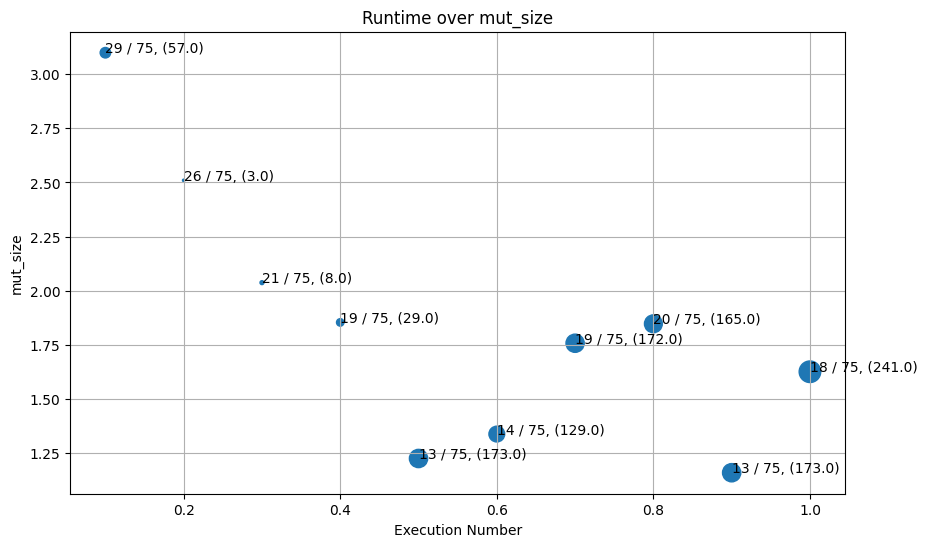

In [ ]:
def plot_runtime_abandon(key, variable="pops_size", path ="results/hyper/pops"):   
# Your JSON data
    combined_data = []
    path = path
    variable = variable
    overall_best = 288
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]
    times = [item["time"][0] for item in combined_data]
    variables = [item[variable] for item in combined_data]
    generations =[item["generations"] for item in combined_data]
    size = [item["best"][0]-overall_best for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111)


    plt.scatter(variables, times, s=size)
    for i in range(len(variables)): 
        txt = f"{len(items_min[i])} / {generations[i]}, ({size[i]})"
        plt.text(variables[i], times[i], txt )
        
        
    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel(variable)
    plt.title(f"Runtime over {variable}")
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_runtime_abandon("pops", "pops_size", path="results/hyper/pops/abandon") # pops, gens, mut, sel
plot_runtime_abandon("gens", "gens", path="results/hyper/gens/abandon")
plot_runtime_abandon("mut", "mut_size", path="results/hyper/mut/abandon")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


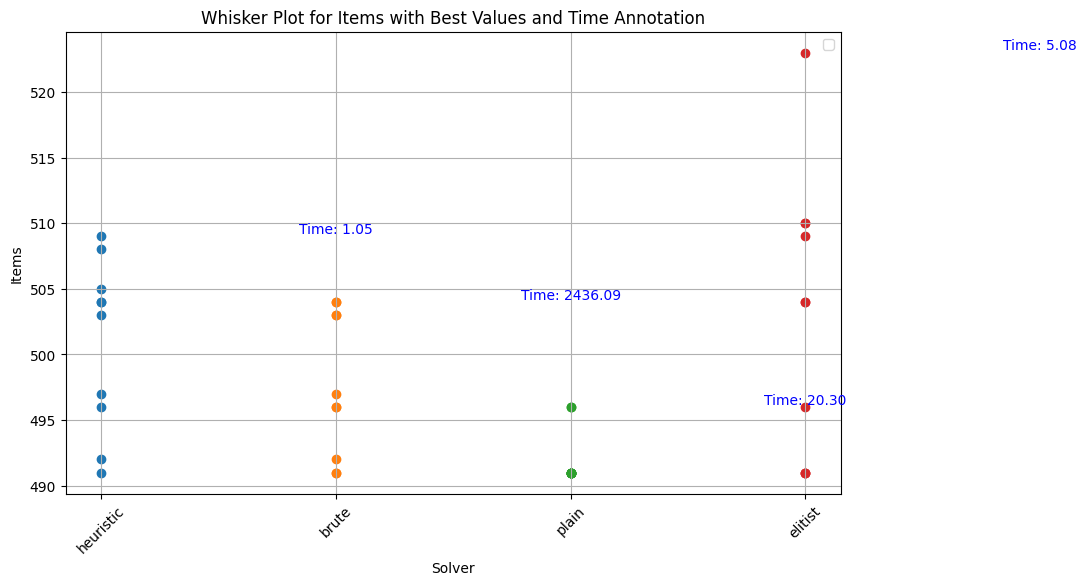

In [ ]:
import matplotlib.pyplot as plt
import json
import os

# Load JSON data from dir_path folder
dir_path = "results/experiments/heterogen/"
combined_data = []
gen_data = []
for file in os.listdir(dir_path):
    if os.path.isdir(dir_path + file):
        continue

    with open(dir_path+file, "r") as f:
        if file[:3] == "gen":
            gen_data.append(json.loads(f.read()))
        else:    
            combined_data.append(json.loads(f.read()))

# Extracting data for plotting
solvers = [item["solver"][0] for item in combined_data]
times = [item["time"][0] for item in combined_data]
items = [item["items"][0] for item in combined_data]
best_values = [item["best"][0] for item in combined_data]

# Extracting Gen Data:
solvers_g = [item["solver"][0] for item in  gen_data]
times_g = [sum(item["times"])/len(item["times"]) for item in gen_data]
items_g = [item["bests"] for item in gen_data]
best_values_g = [min(item["bests"]) for item in gen_data]

for i in range(len(items_g)):
    items.append(items_g[i])
times += times_g
lables =solvers + solvers_g

best_values += (best_values_g)
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
#box = ax.boxplot(items, labels=lables, vert=True, patch_artist=True)

# Plotting
for i, y_values in enumerate(items):
    ax.scatter([i]*len(y_values), y_values)

# Highlight the best values with a red line
#ax.plot(solvers, best_values, color='red', marker='o', linestyle='None', label='Best')

# Adjust x-values for aligning with the boxplot positions
x_values_best = [i + 1 for i in range(len(lables))]

# Highlight the best values with a red line
#ax.plot(x_values_best, best_values, color='red', marker='o', linestyle='None', label='Best')

# Annotate the time on top of each whisker
for i, (solver, time) in enumerate(zip(lables, times)):
    ax.text(i + 1, max(items[i]), f'Time: {time:.2f}', ha='center', va='bottom', color='blue')

# Adding labels and title
plt.xlabel("Solver")
plt.ylabel("Items")
plt.xticks(range(len(lables)), lables, rotation=45)
plt.title("Whisker Plot for Items with Best Values and Time Annotation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [4]:
import pandas as pd
import os

/tmp/ipykernel_20882/3026406390.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Directory containing the JSON files
dir_path_main = "results/experiments/"
folders = []
for folder_name in os.listdir(dir_path_main):
    if os.path.isdir(dir_path_main+folder_name):
        folders.append(folder_name)

folder_combined_dfs = []
for folder in folders:
    dir_path = dir_path_main + folder
    # List to store individual DataFrames
    dfs = []
    brute_dfs = []

    for file_name in os.listdir(dir_path):
        if file_name.endswith('.json') and file_name.startswith("brute"):
            file_path = os.path.join(dir_path, file_name)
            with open(file_path) as f:
                data = json.load(f)
                try:
                    size = data["size"][0]
                except:
                    size = np.nan
            data = {key: value for key, value in data.items() if key in {"solver", "time", "best"}}
            brute_df = pd.DataFrame(data)


    # Iterate over each JSON file in the directory
    for file_name in os.listdir(dir_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(dir_path, file_name)
            # Read JSON file into a DataFrame
            with open(file_path) as f:
                data = json.load(f)
            if file_name.startswith("gen"):
                data = {key: value for key, value in data.items() if key in {"solver", "times", "best_final"}}
                df = pd.DataFrame(data)
                
                df["optimum"] = (df['best_final'] == brute_df.loc[0, "best"]).astype(int)
                column_names = {"solvers":"solver", "times":"time", "best_final":"best"}
                df.rename(columns=column_names, inplace=True)
                df = df.groupby("solver").agg({"solver" : "min", "time": "mean", "best":"mean", "optimum":"sum"})
                df["optimum"] = df["optimum"] / len(data["best_final"])

                # calculate mean delta to brute solution:
                delta = pd.DataFrame([v - brute_df.loc[0, "best"]  for v in  data["best_final"]]).mean()
                df["delta"] = delta[0]

            else:
                data = {key: value for key, value in data.items() if key in {"solver", "time", "best"}}
                df = pd.DataFrame(data)
                delta = data["best"] - brute_df.loc[0,"best"]
                df["delta"] = delta
                df["optimum"] = (df['best'] == brute_df.loc[0, "best"]).astype(int)
                df["optimum"] = df["optimum"] / len(data["best"])
            
            df["time"] = df["time"].round(2)
            # Append the DataFrame to the list       
            dfs.append(df)      

    # Concatenate all DataFrames in the list into one DataFrame
    combined_df = pd.concat(dfs, ignore_index=True).fillna(0.0)
    combined_df["optimum"] = (combined_df["optimum"]*100).round(0).astype(str) + "%"

    # Set the "solver" column as the index
    combined_df.set_index('solver', inplace=True)

    # Reindex the DataFrame with the specified order
    desired_order = ['brute', 'heuristic', 'plain', 'elitist']
    combined_df = combined_df.reindex(desired_order)
    #combined_df = combined_df.add_suffix("_" + folder)
    combined_df.columns = pd.MultiIndex.from_product([[folder + " size: " + str(size) ], combined_df.columns])

    folder_combined_dfs.append(combined_df)


 
# Concatenate the DataFrames
combined_df = pd.concat(folder_combined_dfs, axis=1)
combined_df.rename(columns={"time":"time in sec", "optimum" : "optimum perc."}, inplace=True)


# Display the combined DataFrame
combined_df



close_maxima size: 4147200                             \
                         time in sec   best delta optimum perc.   
solver                                                            
brute                       23697.23  172.0   0.0        100.0%   
heuristic                       2.75  183.0  11.0          0.0%   
plain                           7.05  172.0   0.0        100.0%   
elitist                         3.82  172.0   0.0        100.0%   

          heterogen size: 537600                             \
                     time in sec   best delta optimum perc.   
solver                                                        
brute                    2436.09  491.0   0.0        100.0%   
heuristic                   1.88  491.0   0.0        100.0%   
plain                      31.06  528.1  37.1          0.0%   
elitist                     4.96  504.9  13.9         20.0%   

          fully_synthetic size: 7779240                             \
                            time in sec   best delta optimum perc.   
solver                                                               
brute                          49691.16  357.0   0.0        100.0%   
heuristic                          4.28  370.0  13.0          0.0%   
plain                             37.93  417.5  60.5          0.0%   
elitist                           11.48  363.4   6.4          0.0%   

          no_deletes size: 691200                             \
                      time in sec   best delta optimum perc.   
solver                                                         
brute                     2399.55  492.0   0.0        100.0%   
heuristic                    1.50  492.0   0.0        100.0%   
plain                       20.88  560.9  68.9          0.0%   
elitist                      7.92  504.3  12.3         40.0%   

          invalid_branches size: 1658880                             
                             time in sec   best delta optimum perc.  
solver                                                               
brute                           14142.22  187.0   0.0        100.0%  
heuristic                           3.09  253.0  66.0          0.0%  
plain                              27.17  187.0   0.0        100.0%  
elitist                             7.71  187.0   0.0        100.0%